[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/markbozsoki/ColabNotebooks/blob/main/NASA_Mars_Landmark_Classification.ipynb)
[![GitHub](https://badgen.net/badge/icon/Open%20in%20GitHub?icon=github&label)](https://github.com/markbozsoki/ColabNotebooks/blob/main/NASA_Mars_Landmark_Classification.ipynb)

<h1>Marsi domborzati elemek osztályozása<h1>

###Adatállomány:
_NASA Mars Landmarks Classification_

[![kaggle](https://img.shields.io/badge/Kaggle-20BEFF?style=for-the-badge&logo=Kaggle&logoColor=white)](https://www.kaggle.com/datasets/sshikamaru/mars-landmarks)
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.4002935.svg)](https://doi.org/10.5281/zenodo.4002935)


###Kapcsolódó publikáció:
_Kiri L. Wagstaff, You Lu, Alice Stanboli, Kevin Grimes, Thamme Gowda, and Jordan Padams. "Deep Mars: CNN Classification of Mars Imagery for the PDS Imaging Atlas." Proceedings of the Thirtieth Annual Conference on Innovative Applications of Artificial Intelligence, 2018._

[![DOI](https://zenodo.org/badge/DOI/10.1609/aaai.v32i1.11404.svg)](https://ojs.aaai.org/index.php/AAAI/article/view/11404)


#Bevezetés



https://en.wikipedia.org/wiki/HiRISE

https://en.wikipedia.org/wiki/Mars_Reconnaissance_Orbiter

Az általam vizsgált adatállomány betöltését a Kaggle API-ra kapcsolódva oldottam meg.
A következő kórrészlet letölti és kicsomagolja az adatállományt.

In [ ]:
# DATA ACCESS

print("Initializing Kaggle...")
!pip install -q kaggle
!mkdir -p ~/.kaggle

print("\nInitializing Kaggle API access...")
!pip install --upgrade --no-cache-dir -q gdown
!gdown 1m1sgCgeHHtjeeTtSKjZmFg-CRnuEIEHL -q --output ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

print("")
!kaggle datasets download --force -d sshikamaru/mars-landmarks

print("\nUnzipping mars-landmarks.zip to /content/mars-landmarks")
!unzip -q -o mars-landmarks.zip -d mars-landmarks

print("\nRemoving mars-landmarks.zip")
!rm mars-landmarks.zip

print("\nDone!")

Initializing Kaggle...

Initializing Kaggle API access...
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done

 99% 930M/940M [00:05<00:00, 188MB/s]
100% 940M/940M [00:05<00:00, 189MB/s]

Unzipping mars-landmarks.zip to /content/mars-landmarks

Removing mars-landmarks.zip

Done!


---

In [ ]:
# IMPORTS

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from collections import Counter

A képek a következő osztályokba vannak kklasszifikálva:

In [ ]:
classmap_csv = pd.read_csv("mars-landmarks/landmarks_map-proj-v3_classmap.csv", header=None, names=["Class_ID", "Class_Name"])
classmap_csv

,Class_ID,Class_Name
0,0,other
1,1,crater
2,2,dark dune
3,3,slope streak
4,4,bright dune
5,5,impact ejecta
6,6,swiss cheese
7,7,spider


HiRISE (orbital) image classes

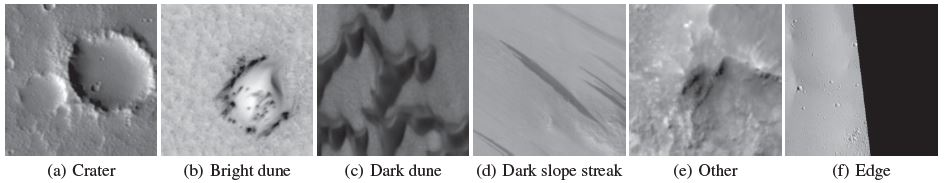

In [ ]:
labels_csv = pd.read_csv("mars-landmarks/labels-map-proj-v3.txt", sep=' ', header=None, names=["Image", "Class_ID"])
labels_csv = labels_csv.merge(classmap_csv, how="inner", on="Class_ID")
labels_csv

,Image,Class_ID,Class_Name
0,ESP_011623_2100_RED-0069.jpg,0,other
1,ESP_011623_2100_RED-0069-r90.jpg,0,other
2,ESP_011623_2100_RED-0069-r180.jpg,0,other
3,ESP_011623_2100_RED-0069-r270.jpg,0,other
4,ESP_011623_2100_RED-0069-fh.jpg,0,other
...,...,...,...
73026,ESP_016758_2570_RED-0037-r180.jpg,4,bright dune
73027,ESP_016758_2570_RED-0037-r270.jpg,4,bright dune
73028,ESP_016758_2570_RED-0037-fh.jpg,4,bright dune
73029,ESP_016758_2570_RED-0037-fv.jpg,4,bright dune


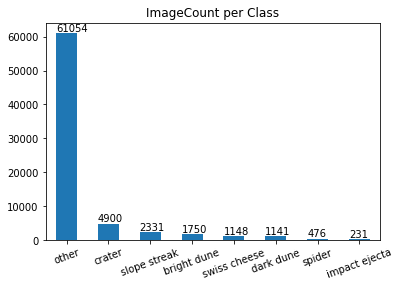

In [ ]:
ax = labels_csv.Class_Name.value_counts().plot.bar(rot=20, title="ImageCount per Class")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()+500))

In [ ]:
# https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py
# https://matplotlib.org/stable/gallery/animation/animated_histogram.html#sphx-glr-gallery-animation-animated-histogram-py